### Hash Table

#### Big O time
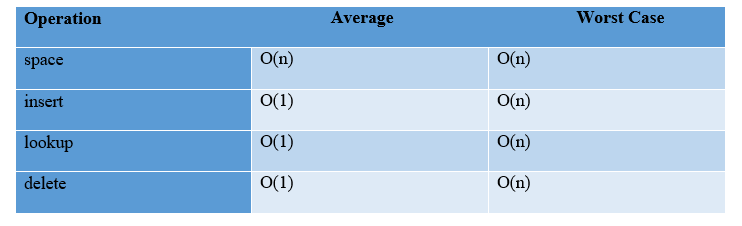

#### Intro
* 特点：
    * 哈希函数 h 是从一个大集合到一个小集合的映射 **|KEY| >> |INDEX|**
    * 很容易产生“**冲突**”现象，即： key1 != key2，而  f(key1) = f(key2)。
    * 降低时间复杂度
        
    
* 哈希函数的设计

    * 设计要求：
        * 函数应能把关键码映射到值域INDEX中尽可能大的部分
        * 不同关键码的哈希值在INDEX里均匀分布，有可能减少冲突
        * 哈希函数的计算应该相对简单
        
    * 设计方法：
        * **除余法**
            * 关键码 key 是整数，用key除以某个不大于哈希表长度m的整数p，得到的余数（或者余数加上l，由下标开始值确定）作为哈希地址
            * 为了存储管理方便，人们经常将m取为2的某个幂值，此时p可以取小于m的最大素数
            * 例如，当m取128、256、512、1024时，p可以分别取127、251、503、1023。            
            * 注意，设计哈希函数的一个基本思想就是尽可能的使得到的结果没有规律，在采用除余法时，如果用偶数作为除数，就会出现偶数关键码映射到偶数哈希值，奇数关键码映射到奇数哈希值的情况，这种情况应该避免
        
        * **基数转换法**
            * 先考虑整数关键码，取一个正整数r把关键码看作基数为r（r进制数），将其转换为十进制或二进制数，通常r取素数以减少规律性
            * 如r取13，对于关键码335647，可转换为十进制(335647)_13 = 7 * 1 + 4 * 13 +... = ... 提取其中若干为作为X的哈希值。一般取大于原来基数的数作为转换的基数，并且两个基数应该是互素的。
            * 当遇到字符串作为关键码时，可以把一个字符看作一个整数，对字符串进行编码，再采用同样的方法，这里给一个简单的字符串哈希函数
        
    
* 冲突消解机制
    * 内消解方法，即在基本存储区内部解决冲突问题 / 开放定址法
        * 当关键字key的哈希地址p=H（key）出现冲突时，以p为基础，产生另一个哈希地址p1，如果p1仍然冲突，再以p为基础，产生另一个哈希地址p2，…，直到找出一个不冲突的哈希地址pi ，将相应元素存入其中。
        * 通用的再散列函数形式：Hi=（H（key）+di）% m   i=1，2，…，n, 其中H（key）为哈希函数，m 为表长，di称为增量序列
        * 例子：哈希表长度m=11，哈希函数为：H（key）= key % 11，则 H（47）=3，H（26）=4，H（60）=5，假设下一个关键字为69，则H（69）=3，与47冲突。如果用线性探测再散列处理冲突，下一个哈希地址为H1=（3 + 1）% 11 = 4，仍然冲突，再找下一个哈希地址为H2=（3 + 2）% 11 = 5，还是冲突，继续找下一个哈希地址为H3=（3 + 3）% 11 = 6，此时不再冲突，将69填入5号单元。
        
    * 冲突的外消解：溢出区方法
        * 外消解基数里常用的一种技术是另外设置一个益处存储区，当插入关键码的哈希表位置没有数据时就直接插入，发生冲突时就将相应数据和关键码一起存入溢出区
    

#### Leetcode 题目

204. Count Primes 筛选素数
* 普通筛选法(BAD)
    * 基本思想：素数的倍数一定不是素数
    * 实现方法：用一个长度为N+1的数组保存信息（0表示素数，1表示非素数），先假设所有的数都是素数（初始化为0），从第一个素数2开始，把2的倍数都标记为非素数（置为1），一直到大于N；然后进行下一趟，找到2后面的下一个素数3，进行同样的处理，直到最后，数组中依然为0的数即为素数。
    * 说明：整数1特殊处理即可。
    * 时间复杂度是O(nloglogn) 空间复杂度是O(n)
* **Sieve of Eratosthenes**  时间复杂度为nlogn
    * 定理：一个数如果不能被从2开始到自身开根号范围内的整数整除，则它是素数
    

In [21]:
import math
# 思想：每个prime的倍数都剔除
def countPrimes(n: int) -> int: # O(n) 空间复杂度是O(n)
    if n <= 2:
        return 0        
    primes = [1] * (n - 2)   
    # 只考虑到根号n，因为到根号n为止，过滤后还是prime的，n以内的数字就是prime
    for i in range(0, int(math.sqrt(n))):  # O(n)
        prime = i + 2
        if primes[i] == 1:
            # 对于每个prime 都让他的倍数 剔除。 但是可以从prime的平方开始，因为他之内的现在还是prime的都肯定是prime
            ranges = prime if prime == 2 else prime * 2
            for j in range(prime ** 2, n, ranges): 
                primes[j - 2] = 0                    
    return sum(primes)

countPrimes(30)

10